In [1]:
import pandas as pd

In [2]:
# (1) Используя параметры pandas прочитать красиво пандас 
df = pd.read_csv('UCI_Credit_Card.csv')

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
# (2) выведите, что за типы переменных, сколько пропусков,
# для численных значений посчитайте пару статистик (в свободной форме)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

In [5]:
#TODO
print(df['MARRIAGE'].count())
print(df['AGE'].mean())

30000
35.4855


In [6]:
# (3) посчитать число женщин с университетским образованием
# SEX (1 = male; 2 = female). 
# EDUCATION (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

#TODO
len(df[
    df['SEX'].isin([2]) 
    & 
    (df['EDUCATION'].isin([2]))
])

8656

In [7]:
# (4) Сгрупировать по "default payment next month" и посчитать медиану для всех показателей начинающихся на BILL_ и PAY_
#TODO

df_columns = list(df.columns)
new_columns = []
for x in df_columns:
    if 'BILL_'in x:
        new_columns.append(x)
    elif 'PAY_' in x:
        new_columns.append(x)
    else:
        continue
df.groupby(by='default.payment.next.month')[new_columns].median()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
default.payment.next.month,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,23119.5,21660.5,20202.5,19000.0,17998.0,16679.0,2459.5,2247.5,2000.0,1734.0,1765.0,1706.0
1,1,0,0,0,0,0,20185.0,20300.5,19834.5,19119.5,18478.5,18028.5,1636.0,1533.5,1222.0,1000.0,1000.0,1000.0


In [8]:
# (5) постройте сводную таблицу (pivot table) по SEX, EDUCATION, MARRIAGE

df.pivot_table(index=['SEX', 'EDUCATION', 'MARRIAGE'], aggfunc='mean')

AGE      BILL_AMT1      BILL_AMT2  \
SEX EDUCATION MARRIAGE                                            
1   0         1         41.000000   11612.500000    4326.000000   
              2         36.500000   11051.666667   11051.666667   
    1         0         37.000000     298.000000     750.000000   
              1         42.423077   60196.886391   56841.282840   
              2         31.704899   54064.399164   52811.889480   
              3         44.533333   64661.733333   60919.266667   
    2         0         38.000000     176.000000     252.000000   
              1         40.332489   56465.218143   54125.950211   
              2         31.584354   50926.275850   48499.191837   
              3         40.698413   35491.222222   32247.698413   
    3         0         38.000000   26227.916667   31324.000000   
              1         44.338740   55910.685115   52443.879771   
              2         35.379195   45000.682327   43400.732662   
              3         47.722222   38469.972222   36403.472222   
    4         1         41.777778   76830.777778   60217.833333   
              2         28.173913   64118.739130   56253.086957   
              3         27.000000    3462.000000    1147.000000   
    5         1         39.354167  104611.791667   99782.916667   
              2         32.630435   74828.086957   70983.934783   
              3         44.000000   40199.000000   39218.000000   
    6         1         48.000000   78274.500000   67747.071429   
              2         40.363636   37394.545455   38328.818182   
2   0         1         37.500000   22374.500000   23274.000000   
              2         42.000000    7662.250000    4821.000000   
    1         0         36.333333    3148.666667    1785.333333   
              1         38.870571   44337.774114   43080.453248   
              2         30.158046   43004.106082   41783.862787   
              3         38.150000   55192.750000   41806.850000   
    2         0         35.800000   31881.400000   35419.200000   
              1         37.527504   54135.562835   51873.166145   
              2         30.405637   53866.076961   51843.868873   
              3         40.868687   43196.595960   40408.939394   
    3         0         38.218750   19299.093750   22961.125000   
              1         42.356315   45768.902372   44013.479316   
              2         36.240394   46695.179310   44834.025616   
              3         46.059701   35120.835821   34891.492537   
    4         1         37.941176   36574.382353   34017.352941   
              2         30.355556   58092.511111   50716.133333   
              3         40.500000     442.500000     649.000000   
    5         1         37.725490   79611.725490   75950.607843   
              2         32.234568   73882.592593   63430.012346   
              3         37.500000  121721.000000  114733.000000   
    6         1         45.000000   85957.571429   85063.785714   
              2         40.900000  111611.000000  110975.700000   
              3         42.000000  181866.000000  160283.000000   

                            BILL_AMT3      BILL_AMT4     BILL_AMT5  \
SEX EDUCATION MARRIAGE                                               
1   0         1           7871.000000   20295.500000   1926.500000   
              2          17312.500000   10767.333333   7372.166667   
    1         0            179.000000    1576.000000    497.000000   
              1          55180.526036   51360.938462  48348.436095   
              2          49665.841246   46617.539309  42545.724269   
              3          60893.433333   57469.500000  52784.100000   
    2         0              0.000000       0.000000      0.000000   
              1          51740.359494   47514.228270  44393.006329   
              2          45166.255782   41269.722449  37845.888435   
              3          32142.619048   25978.333333  21556.095238   
    3         0          18821.583333   

In [9]:
# (6) Создать новый строковый столбец в data frame-е, который:
# принимает значение A, если значение LIMIT_BAL <=10000
# принимает значение B, если значение LIMIT_BAL <=100000 и >10000
# принимает значение C, если значение LIMIT_BAL <=200000 и >100000
# принимает значение D, если значение LIMIT_BAL <=400000 и >200000
# принимает значение E, если значение LIMIT_BAL <=700000 и >400000
# принимает значение F, если значение LIMIT_BAL >700000

#TODO
def segregation(s):
    if s <=10000:
        return 'A'
    elif s <=100000:
        return 'B'
    elif s <=200000:
        return 'C'
    elif s <=400000:
        return 'D'
    elif s <=700000:
        return 'E'
    else:
        return 'F'

df['SEGR'] = df['LIMIT_BAL'].map(segregation)
df.head(10)
        

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,SEGR
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,B
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,C
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,B
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,B
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,B
5,6,50000.0,1,1,2,37,0,0,0,0,...,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0,B
6,7,500000.0,1,1,2,29,0,0,0,0,...,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0,E
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,B
8,9,140000.0,2,3,1,28,0,0,2,0,...,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0,C
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0,B


In [10]:
%matplotlib inline

In [11]:
# (7) постироить распределение LIMIT_BAL (гистрограмму)

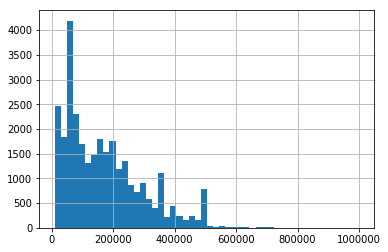

In [12]:
df['LIMIT_BAL'].hist(bins=50) #TODO

/Users/ilyashaklein/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


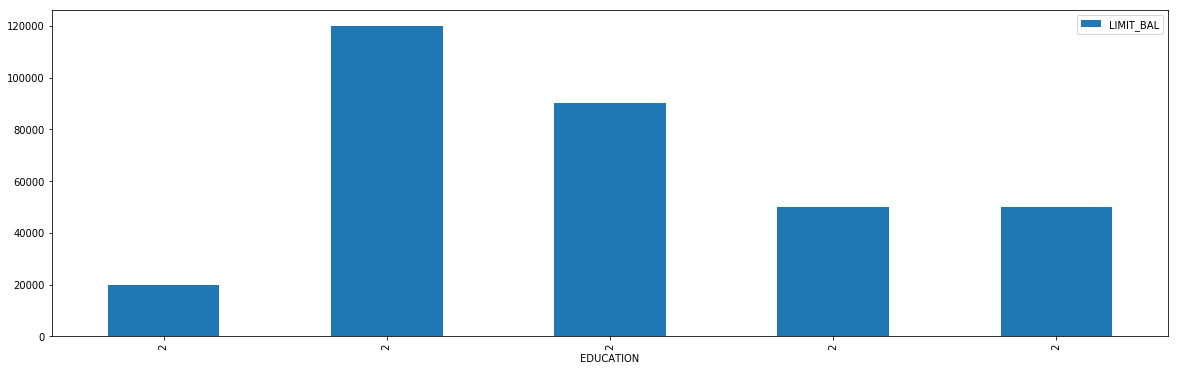

In [20]:
# (8) построить зависимость кредитного лимита от образования для каждого пола
# график необходимо сделать очень широким (на весь экран)
import matplotlib.pyplot as plt
df_credit_limit = df[['SEX', 'LIMIT_BAL', 'EDUCATION']].head()
df_credit_limit.plot(kind = 'bar', x=df_credit_limit['EDUCATION'], y = ['LIMIT_BAL'], figsize=(20,6))#TODO

In [ ]:
# (9) построить зависимость кредитного лимита и образования только для одного из полов
df_credit_limit = df[['SEX', 'LIMIT_BAL', 'EDUCATION']]
df_sex = df_credit_limit[df_credit_limit['SEX']==2]

df_sex.plot(kind = 'bar', x=df_sex['EDUCATION'], y = ['LIMIT_BAL'])#TODO
#TODO

/Users/ilyashaklein/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


In [ ]:
# (10) построить большой график (подсказка - используя seaborn) для построения завимисости всех возможных пар параметров
# разным цветом выделить разные значение "default payment next month"
# (но так как столбцов много - картинка может получиться "монструозной")
# (поэкспериментируйте над тем как построить подобное сравнение параметров)
# (подсказка - ответ может состоять из несколькольких графиков)
# (если не выйдет - программа минимум - построить один график со всеми параметрами)
import seaborn

#TODO